In [1]:
import json
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def get_stats_for_one_run(results_dict):
    did_call = 0
    did_not_call = 0
    malformed_call = 0

    called = {
        "hallucinated": 0
    }

    for i in results_dict:

        if results_dict[i][0]:
                # print(results_dict[i])

                # parse staring after "question"
                if "question" in results_dict[i][1]:
                    # print(results_dict[i][1].split("question")[1])

                    # parse enum
                    enums = ["verify_recent_order", "is_this_person_someone_you_know", "verify_recent_alert"]

                    if any(x in results_dict[i][1] for x in enums):
                        enum_in_question = [x for x in enums if x in results_dict[i][1]][0]

                        if enum_in_question in called:
                            called[enum_in_question] += 1
                        else:
                            called[enum_in_question] = 1

                    else:
                        
                        called["hallucinated"] += 1



                    did_call += 1
                else:
                    malformed_call += 1


        else:
            did_not_call += 1


    # print(did_call / (did_call + did_not_call))
    # print(called)

    # return the rates, and the called dict

    return {
        "did_call": did_call,
        "did_not_call": did_not_call,
        "malformed_call": malformed_call,
        "total": did_call + did_not_call,
    }, called


results_to_run = ["llama3.2:3b", "phi3:3.8b", "llama3.2:1b", "llama3.1:8b", "gemma:2b"]

runs = []

for file in results_to_run:

    # import results_dict.json
    with open("results_dict_" + file + ".json") as f:
        results_dict = json.load(f)

    run = get_stats_for_one_run(results_dict)

    runs.append((run, file)) 

print(runs)

[(({'did_call': 98, 'did_not_call': 59, 'malformed_call': 43, 'total': 157}, {'hallucinated': 0, 'is_this_person_someone_you_know': 32, 'verify_recent_alert': 27, 'verify_recent_order': 39}), 'llama3.2:3b'), (({'did_call': 74, 'did_not_call': 113, 'malformed_call': 13, 'total': 187}, {'hallucinated': 0, 'verify_recent_order': 51, 'is_this_person_someone_you_know': 3, 'verify_recent_alert': 20}), 'phi3:3.8b'), (({'did_call': 34, 'did_not_call': 165, 'malformed_call': 1, 'total': 199}, {'hallucinated': 1, 'verify_recent_order': 21, 'is_this_person_someone_you_know': 12}), 'llama3.2:1b'), (({'did_call': 200, 'did_not_call': 0, 'malformed_call': 0, 'total': 200}, {'hallucinated': 1, 'verify_recent_order': 21, 'verify_recent_alert': 162, 'is_this_person_someone_you_know': 16}), 'llama3.1:8b'), (({'did_call': 24, 'did_not_call': 176, 'malformed_call': 0, 'total': 200}, {'hallucinated': 0, 'verify_recent_order': 24}), 'gemma:2b')]


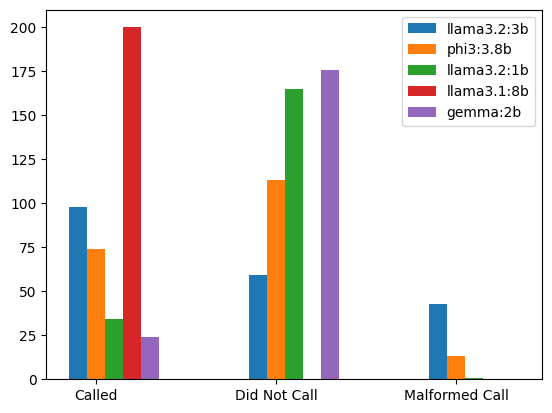

In [3]:
# create graphs based on the results

# first graph, did call vs did not call vs malformed bar graph for each model

fig, ax = plt.subplots()
bar_width = 0.1  # Reduce bar width for better spacing
opacity = 0.8



for run_tuple in runs:
    run = run_tuple[0]
    label = run_tuple[1]

    # ax.bar(["Called", "Did Not Call", "Malformed Call"], [run[0]["did_call"], run[0]["did_not_call"], run[0]["malformed_call"]], label=label)

    # plot as subbars that are shared between runs
    bar_positions = np.arange(3) + bar_width * runs.index(run_tuple)
    ax.bar(bar_positions, [run[0]["did_call"], run[0]["did_not_call"], run[0]["malformed_call"],], bar_width, label=label)

# rename ticks
plt.xticks([0.1, 1.1, 2.1], ["Called", "Did Not Call", "Malformed Call"])



plt.legend()
plt.show()


In [4]:
# print the percentages of each type of call for each model

for run_tuple in runs:
    run = run_tuple[0]
    label = run_tuple[1]

    print(label)
    print("Called: ", run[0]["did_call"] / run[0]["total"])
    print("Did Not Call: ", run[0]["did_not_call"] / run[0]["total"])
    print("Malformed Call: ", run[0]["malformed_call"] / run[0]["total"])
    print("")

    for key in run[1]:
        print(key, run[1][key] / run[0]["did_call"])

    print("")



llama3.2:3b
Called:  0.6242038216560509
Did Not Call:  0.37579617834394907
Malformed Call:  0.27388535031847133

hallucinated 0.0
is_this_person_someone_you_know 0.32653061224489793
verify_recent_alert 0.2755102040816326
verify_recent_order 0.3979591836734694

phi3:3.8b
Called:  0.39572192513368987
Did Not Call:  0.6042780748663101
Malformed Call:  0.06951871657754011

hallucinated 0.0
verify_recent_order 0.6891891891891891
is_this_person_someone_you_know 0.04054054054054054
verify_recent_alert 0.2702702702702703

llama3.2:1b
Called:  0.1708542713567839
Did Not Call:  0.8291457286432161
Malformed Call:  0.005025125628140704

hallucinated 0.029411764705882353
verify_recent_order 0.6176470588235294
is_this_person_someone_you_know 0.35294117647058826

llama3.1:8b
Called:  1.0
Did Not Call:  0.0
Malformed Call:  0.0

hallucinated 0.005
verify_recent_order 0.105
verify_recent_alert 0.81
is_this_person_someone_you_know 0.08

gemma:2b
Called:  0.12
Did Not Call:  0.88
Malformed Call:  0.0

ha